{'00000': 1, '00002': 1, '00003': 0, '00005': 1, '00006': 1, '00008': 1, '00009': 0, '00011': 1, '00012': 1, '00014': 1, '00017': 0, '00018': 0, '00019': 0, '00020': 1, '00021': 0, '00022': 0, '00024': 0, '00025': 1, '00026': 1, '00028': 1, '00030': 0, '00031': 1, '00032': 0, '00033': 1, '00035': 1, '00036': 0, '00043': 1, '00044': 0, '00045': 0, '00046': 1, '00048': 1, '00049': 0, '00052': 1, '00053': 0, '00054': 1, '00056': 1, '00058': 1, '00059': 1, '00060': 1, '00061': 0, '00062': 1, '00063': 1, '00064': 0, '00066': 1, '00068': 1, '00070': 1, '00071': 1, '00072': 0, '00074': 1, '00077': 1, '00078': 1, '00081': 0, '00084': 0, '00085': 1, '00087': 1, '00088': 0, '00089': 1, '00090': 0, '00094': 1, '00095': 0, '00096': 1, '00097': 0, '00098': 1, '00099': 0, '00100': 1, '00102': 0, '00104': 0, '00105': 1, '00106': 1, '00107': 1, '00108': 0, '00109': 1, '00110': 0, '00111': 0, '00112': 0, '00113': 0, '00116': 0, '00117': 1, '00120': 1, '00121': 0, '00122': 0, '00123': 0, '00124': 0, '00

Affine tranformation - slice 37
Affine tranformation - slice 38
Affine tranformation - slice 39
Affine tranformation - slice 40
Affine tranformation - slice 41
Affine tranformation - slice 42
Affine tranformation - slice 43
Affine tranformation - slice 44
Affine tranformation - slice 45
Affine tranformation - slice 46
Affine tranformation - slice 47
Affine tranformation - slice 48
Affine tranformation - slice 49
Affine tranformation - slice 50
Affine tranformation - slice 51
Affine tranformation - slice 52
Affine tranformation - slice 53
Affine tranformation - slice 54
Affine tranformation - slice 55
Affine tranformation - slice 56
Affine tranformation - slice 57
Affine tranformation - slice 58
Affine tranformation - slice 59
Affine tranformation - slice 60
Affine tranformation - slice 61
Affine tranformation - slice 62
Affine tranformation - slice 63
Affine tranformation - slice 64
Affine tranformation - slice 65
Affine tranformation - slice 66
Affine tranformation - slice 67
Affine t

Affine tranformation - slice 288
Affine tranformation - slice 289
Affine tranformation - slice 290
Affine tranformation - slice 291
Affine tranformation - slice 292
Affine tranformation - slice 293
Affine tranformation - slice 294
Affine tranformation - slice 295
Affine tranformation - slice 296
Affine tranformation - slice 297
Affine tranformation - slice 298
Affine tranformation - slice 299
Affine tranformation - slice 300
Affine tranformation - slice 301
Affine tranformation - slice 302
Affine tranformation - slice 303
Affine tranformation - slice 304
Affine tranformation - slice 305
Affine tranformation - slice 306
Affine tranformation - slice 307
Affine tranformation - slice 308
Affine tranformation - slice 309
Affine tranformation - slice 310
Affine tranformation - slice 311
Affine tranformation - slice 312
Affine tranformation - slice 313
Affine tranformation - slice 314
Affine tranformation - slice 315
Affine tranformation - slice 316
Affine tranformation - slice 317
Affine tra

FileNotFoundError: [Errno 2] No such file or directory: 'Dicom/dicom_00658_0.npy'

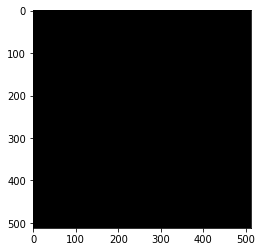

In [1]:
import pydicom as dicom
import numpy as np
import matplotlib.pylab as plt
import scipy

import time
import os
import csv

from skimage.transform import resize
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

import cv2
import numpy as np

# Import Densenet from Keras
from keras.applications.densenet import DenseNet121
from keras.layers import Input, merge, ZeroPadding2D
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D
from keras.models import Model
from keras import backend as K

from scipy.ndimage import zoom
from numpy import save, load

mgmt_dictionary = {}
with open('/Users/user/Desktop/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    for row in csvreader:        
        mgmt_dictionary[row[0]] = int(row[1])
print(mgmt_dictionary)

def affine_tranformation(patient_id, numSlices):
    image_path = '/Users/user/Desktop/rsna-miccai-brain-tumor-radiogenomic-classification/train/'+patient_id+'/T1wCE/'
    last_image_path = image_path + 'Image-' + str(numSlices) + '.dcm'
    # print("image path %s" % last_image_path)
    ds = dicom.dcmread(last_image_path)
    # print("Patient ID: %s" % patient_id)
    rows=0
    columns=0
    for value in ds:
        str_value = str(value).rstrip('\n')
        if 'Rows' in str_value:
            rows = int(str_value.split(':')[1])
        if 'Columns' in str_value:
            columns = int(str_value.split(':')[1])
        if 'Image Position (Patient)' in str_value:
            image_position_str = str_value.split(':')[1]
            # print(image_position_str)
            image_position_str = image_position_str.rstrip(']')
            image_position_str = image_position_str.lstrip()
            image_position_str = image_position_str.lstrip('[')
            TNx = float(image_position_str.split(',')[0])
            TNy = float(image_position_str.split(',')[1])
            TNz = float(image_position_str.split(',')[2])
            # print("TNx, TNy, TNz: (%f,%f,%f)" % (TNx, TNy, TNz))
    first_image_path = image_path + 'Image-1.dcm'
    # print("image path %s" % first_image_path)
    ds = dicom.dcmread(first_image_path)
    for value in ds:
        str_value = str(value).rstrip('\n')
        if 'Rows' in str_value:
            rows = int(str_value.split(':')[1])
        if 'Columns' in str_value:
            columns = int(str_value.split(':')[1])
        if 'Image Position (Patient)' in str_value:
            image_position_str = str_value.split(':')[1]
            # print(image_position_str)
            image_position_str = image_position_str.rstrip('\]')
            image_position_str = image_position_str.lstrip()
            image_position_str = image_position_str.lstrip('\[')
            T1x = float(image_position_str.split(',')[0])
            T1y = float(image_position_str.split(',')[1])
            T1z = float(image_position_str.split(',')[2])
            # print("T1x, T1y, T1z: (%f,%f,%f)" % (T1x, T1y, T1z))
    k1 = (TNx - T1x)/(numSlices-1)
    k2 = (TNy - T1y)/(numSlices-1)
    k3 = (TNz - T1z)/(numSlices-1)
    Px = []
    Py = []
    Pz = []
    # print("Rows: %d, Columns: %d, numSlices: %d" % (rows, columns, numSlices))
    values=np.empty((rows,columns,numSlices))
    for z in range(0, numSlices):
        #if z % 30 == 0:
        print('Affine tranformation - slice %d' % z)
        image_path = '/Users/user/Desktop/rsna-miccai-brain-tumor-radiogenomic-classification/train/'+patient_id+'/T1wCE/Image-'+str(z+1)+'.dcm'
        if os.path.exists(image_path):
            # print("Image path: %s" % image_path)
            ds = dicom.dcmread(image_path)
            slice_spacing = 0
            slice_thickness = 0
            for value in ds:
                str_value = str(value).rstrip('\n')
                if 'Rows' in str_value:
                    rows = int(str_value.split(':')[1])
                    # print("Num Rows: %d" % rows)
                if 'Columns' in str_value:
                    columns = int(str_value.split(':')[1])
                    # print("Num Columns: %d" % columns)
                if 'Slice Thickness' in str_value:
                    slice_thickness = float(str_value.split('\'')[1])
                if 'Spacing Between Slices' in str_value:
                    slice_spacing = float(str_value.split('\'')[1])
                if 'Image Position (Patient)' in str_value:
                    image_position_str = str_value.split(':')[1]
                    image_position_str = image_position_str.rstrip(']')
                    image_position_str = image_position_str.lstrip()
                    image_position_str = image_position_str.lstrip('[')
                    sx = float(image_position_str.split(',')[0])
                    sy = float(image_position_str.split(',')[1])
                    sz = float(image_position_str.split(',')[2])
                if 'Image Orientation (Patient)' in str_value:
                    image_orientation_str = str_value.split(':')[1]
                    image_orientation_str = image_orientation_str.rstrip(']')
                    image_orientation_str = image_orientation_str.lstrip()
                    image_orientation_str = image_orientation_str.lstrip('[')
                    Xx = float(image_orientation_str.split(',')[0])
                    Xy = float(image_orientation_str.split(',')[1])
                    Xz = float(image_orientation_str.split(',')[2])
                    Yx = float(image_orientation_str.split(',')[3])
                    Yy = float(image_orientation_str.split(',')[4])
                    Yz = float(image_orientation_str.split(',')[5])
                    X = [Xx, Xy, Xz]
                    Y = [Yx, Yy, Yz]
                if 'Pixel Spacing' in str_value:
                    pixel_spacing_str = str_value.split(':')[1]
                    pixel_spacing_str = pixel_spacing_str.rstrip(']')
                    pixel_spacing_str = pixel_spacing_str.lstrip()
                    pixel_spacing_str = pixel_spacing_str.lstrip('[')
                    dx = float(pixel_spacing_str.split(',')[0])
                    dy = float(pixel_spacing_str.split(',')[1])
            dz = slice_spacing + slice_thickness
            A = np.empty((4,4))
            A[0][0] = Xx * dx
            A[1][0] = Xy * dx
            A[2][0] = Xz * dx
            A[3][0] = 0
            A[0][1] = Yx * dy
            A[1][1] = Yy * dy
            A[2][1] = Yz * dy
            A[3][1] = 0
            A[0][2] = k1
            A[1][2] = k2
            A[2][2] = k3
            A[3][2] = 0
            A[0][3] = sx
            A[1][3] = sy
            A[2][3] = sz
            A[3][3] = float(1.0)
            V = np.empty((4,1))
            # print("sz: %f" % sz)
            # print("k3: %f" % k3)
            for r in range(0, rows):
                for c in range(0, columns):
                    V[0] = r
                    V[1] = c
                    V[2] = z
                    V[3] = 1
                    P = np.matmul(A, V)
                    Px.extend(P[0])
                    Py.extend(P[1])
                    Pz.extend(P[2])
            # print("Px len: %d" % len(Px))
            img2=np.uint8(cv2.normalize(ds.pixel_array, None, 0, 255, cv2.NORM_MINMAX))
            equalizedImage = cv2.equalizeHist(img2)
            plt.imshow(equalizedImage, cmap=plt.cm.gray)
            for x in range(0,rows):
                for y in range(0,columns):
                    values[x][y][z] = equalizedImage[x][y]

    # print("Values array size: %d" % (rows*columns*numSlices))
    return Px,Py,Pz,values

COMPRESSION_RATIO=.125

DICOM_UNIFORM_ROWS=64
DICOM_UNIFORM_COLUMNS=64
DICOM_UNIFORM_SLICES=32

PATCH_SIZE_X=64
PATCH_SIZE_Y=64
PATCH_SIZE_Z=32

# DICOM_UNIFORM_ROWS=128
# DICOM_UNIFORM_COLUMNS=128
# DICOM_UNIFORM_SLICES=96
# PATCH_SIZE_X=120
# PATCH_SIZE_Y=120
# PATCH_SIZE_Z=30

def nearest_neighbor_interpolation(Px, Py, Pz, values):
    px = np.array(Px)
    py = np.array(Py)
    pz = np.array(Pz)
    points = np.array((Px, Py, Pz)).T
    
    # Assuming you want 512x512x256 datapoints from all patient scans
    delta_x = px[len(px)-1]-px[0]/DICOM_UNIFORM_ROWS
    delta_y = py[len(py)-1]-py[0]/DICOM_UNIFORM_COLUMNS
    delta_z = pz[len(pz)-1]-pz[0]/DICOM_UNIFORM_SLICES

    print("Nearest Neighbor interpolation started")
    nearest_interp = scipy.interpolate.NearestNDInterpolator(points, values) 
    for x in range(0,DICOM_UNIFORM_ROWS):
        for y in range(0,DICOM_UNIFORM_COLUMNS):
            for z in range(0,DICOM_UNIFORM_SLICES):
                point_x = x * delta_x
                point_y = y * delta_y
                point_z = z * delta_z
                point = np.array([point_x,point_y,point_z])
                interpolated_image[x][y][z] = nearest_interp(point)
    
    print("Uniform interpolation done")    
    return interpolated_image

def create_patches(image_data):
    print("Creating patches")
    patches = []
    patch = np.empty((PATCH_SIZE_X,PATCH_SIZE_Y,PATCH_SIZE_Z))
    width, height, depth = image_data.shape
    nx_patches = width/PATCH_SIZE_X
    ny_patches = height/PATCH_SIZE_Y
    nz_patches = depth/PATCH_SIZE_Z
    for x in range(0,width,PATCH_SIZE_X):
        for y in range(0,height,PATCH_SIZE_Y):
            for z in range(0,depth,PATCH_SIZE_Z):
                if z+PATCH_SIZE_Z > depth:
                    break
                for px in range(0,PATCH_SIZE_X):
                    for py in range(0,PATCH_SIZE_Y):
                        for pz in range(0,PATCH_SIZE_Z):
                            patch[px][py][pz] = image_data[x+px][y+py][z+pz]
                patches.append(patch)
                # print("patch count: %d" % len(patches))
            if y+PATCH_SIZE_Y > height:
                break
        if x+PATCH_SIZE_X > width:
            break
    print("Final patch count: %d" % len(patches))
    return patches

def save_patches(patient_id, patches):
    print("Saving patches for patient %s", patient_id)
    for patch_num, patch in enumerate(patches):
        patch_array = np.array(patch)
        output_file = 'Dicom/dicom_' + patient_id + '_' + str(patch_num) + '.npy'
        save(output_file, patch_array)
    return patches

def compress_image(Px, Py, Pz, values, x_scale, y_scale, z_scale):
    print("Compression started, scale: (%f,%f,%f)" % (x_scale, y_scale, z_scale))
    compressed_values = zoom(values, (x_scale, y_scale, z_scale))
    count = 0
    zoom_x = []
    zoom_y = []
    zoom_z = []
    width, height, depth = values.shape
    zoom_values = np.empty((int(width*height*depth*x_scale*y_scale*z_scale)))
    for x in range(0,int(width*x_scale)):
        for y in range(0,int(height*y_scale)):
            for z in range(0,int(depth*z_scale)):
                zoom_values[count] = compressed_values[x][y][z]
                zoom_x.append(int(Px[int(x/x_scale)]*x_scale));
                zoom_y.append(int(Py[int(y/y_scale)]*y_scale));
                zoom_z.append(int(Pz[int(z/z_scale)]*z_scale));    
                count = count + 1
                   
    return zoom_x, zoom_y, zoom_z, zoom_values

def load_patch(patient_id, patch_num):
    print("Loading patch, Patient id: %s, Patch num: %d" % (patient_id, patch_num))
    patch_file = 'Dicom/dicom_' + patient_id + '_' + str(patch_num) + '.npy'
    patch_array = np.load(patch_file)
    print(patch_array)
 
interpolated_image = np.empty((DICOM_UNIFORM_ROWS,DICOM_UNIFORM_COLUMNS,DICOM_UNIFORM_SLICES))        
for patient_folder in os.listdir('/Users/user/Desktop/rsna-miccai-brain-tumor-radiogenomic-classification/train/'):
    # if patient_folder != '.DS_Store':
    image_path = '/Users/user/Desktop/rsna-miccai-brain-tumor-radiogenomic-classification/train/'+patient_folder+'/T1wCE/'
    numSlices = len([name for name in os.listdir(image_path)])
    # numSlices = 8
    print('Patient %d Num Slices %d' % (int(patient_folder), numSlices))
    Px,Py,Pz,values = affine_tranformation(patient_folder, numSlices)
    print("Affine transformation completed")
    Px,Py,Pz,compressed_values = compress_image(Px,Py,Pz,values,COMPRESSION_RATIO,COMPRESSION_RATIO,COMPRESSION_RATIO)
    print("Compression completed")
    interpolated_image = nearest_neighbor_interpolation(Px,Py,Pz,compressed_values)
    print("Nearest Neighbor interpolation completed")
    patches = create_patches(interpolated_image)
    print("Creating Patches completed")
    save_patches(patient_folder,patches)
    print("Save Patches completed")
    break
    
def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    plt.imshow(interpolated_image[:, :, layer], cmap='gray')
    plt.title('Explore Layers of Brain MRI', fontsize=20)
    plt.axis('off')
    return layer

interact(explore_3dimage, layer=(0, interpolated_image.shape[2]-1))